In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def CropImage(image):
  #Chuyển về ảnh xám
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #Phân ngưỡng ảnh thành ảnh có 2 loại điểm ảnh 0 và 255
  threshold, img = cv2.threshold(image, 125, maxval = 255, type = cv2.THRESH_BINARY)
  #Xử lý nhiễu với bộ lọc Median
  img = cv2.medianBlur(img, 5)

  #Cắt ảnh vào sát chữ
  maxUp = img.shape[0]//2
  maxDown = img.shape[0]//2
  maxRight = img.shape[1]//2
  maxLeft = img.shape[1]//2

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] < 160:
        if maxUp >= i: maxUp = i
        if maxDown <= i: maxDown = i
        if maxRight <= j: maxRight = j
        if maxLeft >= j: maxLeft = j
        
  #cắt ảnh
  cropImage = img[maxUp:maxDown + 1, maxLeft:maxRight + 1]
  #resize ảnh về kích thước 16x20
  cropImage = cv2.resize(cropImage,(16, 20), interpolation=cv2.INTER_AREA) 
  return cropImage

In [ ]:
def XulyData(path_to_files):
  for file_name in sorted(os.listdir(path_to_files)):
    file_path = os.path.join(path_to_files,file_name)
    for image in sorted(os.listdir(file_path)):
        image_path = os.path.join(file_path,image)
        img = cv2.imread(image_path)
        img = CropImage(img)
        os.chdir(file_path)
        cv2.imwrite(image_path, img)  

In [ ]:
XulyData('/content/drive/MyDrive/test/Hai Image')

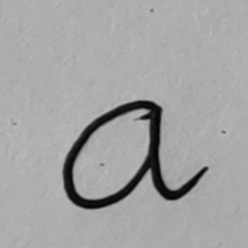

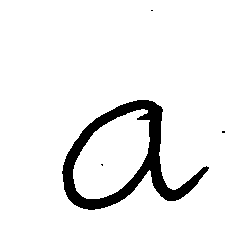

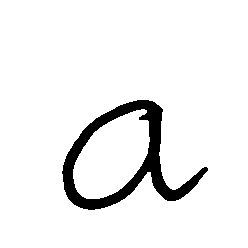

In [ ]:
image = cv2.imread('/content/drive/MyDrive/test/Number/aaa.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = cv2.resize(image, (0, 0), fx = 0.3, fy = 0.3)
cv2_imshow(image)
threshold, img = cv2.threshold(image, 125, maxval = 255, type = cv2.THRESH_BINARY)
cv2_imshow(img)
img = cv2.medianBlur(img, 5)
cv2_imshow(img)

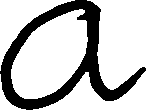

In [ ]:
maxUp = img.shape[0]//2
maxDown = img.shape[0]//2
maxRight = img.shape[1]//2
maxLeft = img.shape[1]//2

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] < 160:
      if maxUp >= i: maxUp = i
      if maxDown <= i: maxDown = i
      if maxRight <= j: maxRight = j
      if maxLeft >= j: maxLeft = j
cropImage = img[maxUp:maxDown + 1, maxLeft:maxRight + 1]
cv2_imshow(cropImage)
cropImage = cv2.resize(cropImage,(16, 20), interpolation=cv2.INTER_AREA)
cv2_imshow(cropImage)